In [1]:
import skimage
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
model = load_model('./models/EfficientNetV2L.h5')

2022-07-02 20:30:40.296822: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from skimage.segmentation import mark_boundaries
from lime import lime_image
from tensorflow.keras.preprocessing import image

def read_and_transform_img(url):
    img = image.load_img(url, target_size=(128, 128))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

def lime(img, model):
    explainer = lime_image.LimeImageExplainer()
    explanation= explainer.explain_instance(img[0].astype('double'), model.predict,  top_labels=3, hide_color=0, num_samples=1000)

    temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
    temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
    # ax1.imshow(mark_boundaries((temp_1+1)/2, mask_1))
    # ax2.imshow(mark_boundaries((temp_2+1)/2, mask_2))
    mask = mark_boundaries(temp_1/255, mask_1)
    overlayed = mark_boundaries(temp_2/255, mask_2)
    ax1.imshow(mask)
    ax2.imshow(overlayed)
    ax1.axis('off')
    ax2.axis('off')
    return temp_1/255, overlayed

/home/csa/micromamba/envs/rs/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
labels = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

In [4]:
url = '/home/csa/data/Study/Research/New Plant Diseases/test/Apple___Apple_scab/518ab601-3736-4d3b-9770-a0efba601c0e___FREC_Scab 3231.JPG'
img = read_and_transform_img(url)
preds = model.predict(img)
prediction = np.argmax(preds)
pct = np.max(preds)

print(f"It's a {labels[prediction]} {prediction}")
print(pct)

It's a Apple___Apple_scab 0
0.9999999


100%|██████████| 1000/1000 [00:46<00:00, 21.70it/s]


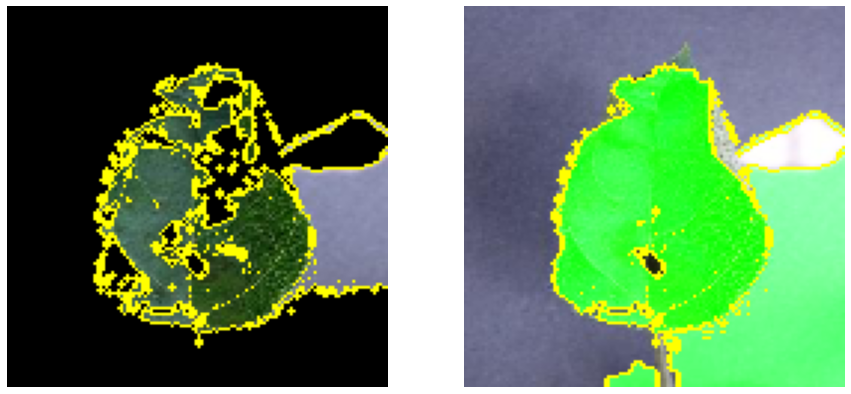

In [5]:
mask, overlayed = lime(img, model)

In [6]:
from PIL import Image

Image.fromarray((img[0]).astype('uint8')).save('original.png')
Image.fromarray((mask*255).astype('uint8')).save('mask.png')
Image.fromarray((overlayed*255).astype('uint8')).save('overlayed.png')